In [56]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

data = pd.read_csv('data/sentiment.csv', index_col=0)
data = data.drop(columns=['Text'])
data.head()

,Change In Price,Favorites,Retweets,Negative,Neutral,Positive,Compound
2020-01-27,3.205994,6544.600000,814.000000,0.030,0.853,0.117,0.7959
2020-01-28,-0.318001,79576.500000,6452.666667,0.000,0.813,0.187,0.8718
2020-01-29,1.059998,35996.769231,4025.000000,0.028,0.715,0.257,0.9775
2020-01-30,1.678001,53946.166667,4608.000000,0.129,0.842,0.028,-0.5707
2020-01-31,2.113998,53814.944444,5062.500000,0.043,0.716,0.241,0.9726


In [57]:
linearRegression = LinearRegression()
X = data[["Favorites", "Retweets", "Negative", "Neutral", "Positive", "Compound"]]
Y = data["Change In Price"]
lin_x_train, lin_x_test, lin_y_train, lin_y_test = train_test_split(X, Y, test_size=0.2)
linearRegression.fit(lin_x_train, lin_y_train)

lin_predictions = linearRegression.predict(lin_x_test)
lin_error = mean_squared_error(lin_y_test, lin_predictions) 
print(lin_error)

63.04690079560993


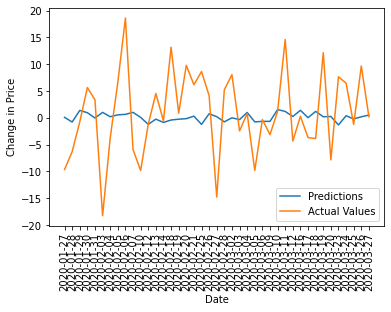

In [58]:
plt.plot(data.index[:len(lin_predictions)], lin_predictions)
plt.plot(data.index[:len(lin_y_test)], lin_y_test)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Change in Price')
plt.legend(["Predictions","Actual Values"])
plt.show()

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
rf_x_train, rf_x_test, rf_y_train, rf_y_test = train_test_split(X, Y, test_size=0.2)
rf = RandomForestRegressor(n_estimators = 10000, random_state=0, bootstrap=True)
rf.fit(rf_x_train, rf_y_train)
rf_predictions = rf.predict(rf_x_test)
rf_error = mean_squared_error(rf_y_test, rf_predictions) 
print(rf_error)

142.65046192308213


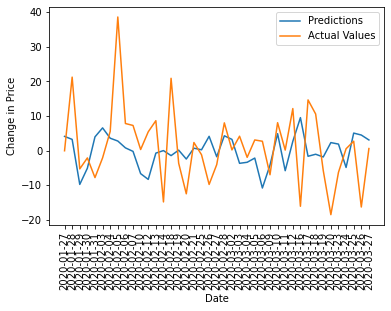

In [60]:
plt.plot(data.index[:len(rf_predictions)], rf_predictions)
plt.plot(data.index[:len(rf_y_test)], rf_y_test)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Change in Price')
plt.legend(["Predictions","Actual Values"])
plt.show()

In [89]:
# Implement support vector regressor with nonlinear/linear kernel
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

x_standardScaler = StandardScaler()
y_standardScaler = StandardScaler()
x_scaled = x_standardScaler.fit_transform(X)
y_scaled = y_standardScaler.fit_transform(Y.values.reshape(-1,1)).ravel()

svr_x_train, svr_x_test, svr_y_train, svr_y_test = train_test_split(x_scaled, Y, test_size=0.2)

In [90]:
svmRegressor = SVR(kernel='rbf')
svmRegressor.fit(svr_x_train, svr_y_train)

SVR()

In [92]:
svr_predictions = svmRegressor.predict(svr_x_test)
error = mean_squared_error(y_standardScaler.inverse_transform(y_test), y_standardScaler.inverse_transform(predictions)) 
# error = mean_squared_error(svr_y_test, svr_predictions) 
print(error)

146.07816882909958


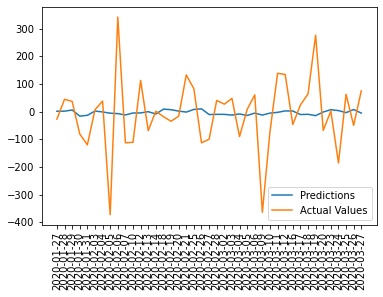

In [93]:
plt.plot(data.index[:len(svr_predictions)], y_standardScaler.inverse_transform(svr_predictions))
plt.plot(data.index[:len(svr_y_test)], y_standardScaler.inverse_transform(svr_y_test))
# plt.plot(data.index[:len(svr_predictions)], svr_predictions)
# plt.plot(data.index[:len(svr_y_test)], svr_y_test)
plt.xticks(rotation=90)
plt.legend(["Predictions","Actual Values"])
plt.show()

In [75]:
# Implement KNNRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

In [97]:
scaler = MinMaxScaler(feature_range = (0, 1))

knr_x_train, knr_x_test, knr_y_train, knr_y_test = train_test_split(X, Y, test_size=0.2)

x_min_max_scaled_train = scaler.fit_transform(knr_x_train)
x_min_max_scaled_test = scaler.fit_transform(knr_x_test)
y_min_max_scaled_train = scaler.fit_transform(knr_y_train.values.reshape(-1,1))
y_min_max_scaled_test = scaler.fit_transform(knr_y_test.values.reshape(-1,1))

In [98]:
mse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(x_min_max_scaled_train, y_min_max_scaled_train)  #fit the model
    pred=model.predict(x_min_max_scaled_test) #make prediction on test set
    error = mean_squared_error(y_min_max_scaled_test,pred) #calculate mse
    mse_val.append(error) #store mse values
    print('MSE value for k= ' , K , 'is:', error)

MSE value for k=  1 is: 0.10104113175508561
MSE value for k=  2 is: 0.09848931252229132
MSE value for k=  3 is: 0.09784642805106307
MSE value for k=  4 is: 0.09919992604510978
MSE value for k=  5 is: 0.09667048901783373
MSE value for k=  6 is: 0.09629123425801585
MSE value for k=  7 is: 0.09587354838107005
MSE value for k=  8 is: 0.09515973126472552
MSE value for k=  9 is: 0.0960985208489729
MSE value for k=  10 is: 0.09803609663704053
MSE value for k=  11 is: 0.0991995272403254
MSE value for k=  12 is: 0.09808099213064331
MSE value for k=  13 is: 0.0988984433243691
MSE value for k=  14 is: 0.09936064233576981
MSE value for k=  15 is: 0.10151209501701497
MSE value for k=  16 is: 0.1038138548478892
MSE value for k=  17 is: 0.10407909739148773
MSE value for k=  18 is: 0.10707197278746547
MSE value for k=  19 is: 0.1067263188865968
MSE value for k=  20 is: 0.10624134538130724


<AxesSubplot:>

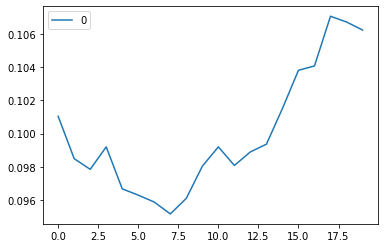

In [100]:
pd.DataFrame(mse_val).plot()